# Analyzing sequential data using recurrent neural networks

We have been dealing with static data so far. Artificial neural networks are good at building models for sequential data too. In particular, recurrent neural networks are great at modeling sequential data. Perhaps time-series data is the most commonly occurring form of sequential data in our world. You can learn more about recurrent neural networks at http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns. When we are working with time-series data, we cannot just use generic learning models. We need to characterize the temporal dependencies in our data so that we can build a robust model. Let's see how to build it.



In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl 

Define a function to generate the waveforms. Start by defining four sine waves:



In [38]:
def get_data(num_points): 
    # Create sine waveforms 
    wave_1 = 0.5 * np.sin(np.arange(0, num_points)) 
    wave_2 = 3.6 * np.sin(np.arange(0, num_points)) 
    wave_3 = 1.1 * np.sin(np.arange(0, num_points)) 
    wave_4 = 4.7 * np.sin(np.arange(0, num_points)) 
    
    # Create varying amplitudes 
    amp_1 = np.ones(num_points) 
    amp_2 = 2.1 + np.zeros(num_points)  
    amp_3 = 3.2 * np.ones(num_points)  
    amp_4 = 0.8 + np.zeros(num_points)  

    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1) 
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1) 

    return wave, amp  

Define a function to visualize the output of the neural network:




In [39]:
# Visualize the output  
def visualize_output(nn, num_points_test): 
    wave, amp = get_data(num_points_test) 
    output = nn.sim(wave) 
    plt.plot(amp.reshape(num_points_test * 4)) 
    plt.plot(output.reshape(num_points_test * 4)) 


Define the main function and create a waveform:



In [40]:
# Create some sample data 
num_points = 40 
wave, amp = get_data(num_points) 


Create a recurrent neural network with two layers:



In [42]:
# Create a recurrent neural network with 2 layers 
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()]) 

Set the initializer functions for each layer:



In [45]:
# Set the init functions for each layer  
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb') 
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb') 
nn.init() 

Train the neural network:

In [46]:
# Train the recurrent neural network 
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01) 


Epoch: 100; Error: 3.129313279603463;
Epoch: 200; Error: 0.7706221120690623;
Epoch: 300; Error: 0.815220958531504;
Epoch: 400; Error: 0.25724125808578113;
Epoch: 500; Error: 0.3387241570105236;
Epoch: 600; Error: 0.0808081738967852;
Epoch: 700; Error: 0.060235803584746006;
Epoch: 800; Error: 0.4547449998145928;
Epoch: 900; Error: 0.05505907038885048;
Epoch: 1000; Error: 0.11123522057938903;
Epoch: 1100; Error: 0.05106316351559603;
Epoch: 1200; Error: 0.0630261648207974;
The maximum number of train epochs is reached


Run the data through the network:

In [48]:
# Run the training data through the network 
output = nn.sim(wave) 

Plot the output:

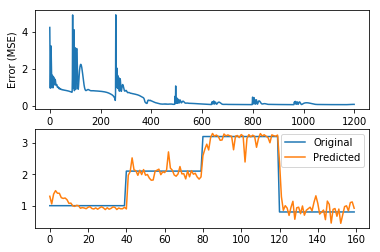

In [50]:
# Plot the results 
plt.subplot(211) 
plt.plot(error_progress) 
plt.xlabel('Number of epochs') 
plt.ylabel('Error (MSE)') 

plt.subplot(212) 
plt.plot(amp.reshape(num_points * 4)) 
plt.plot(output.reshape(num_points * 4)) 
plt.legend(['Original', 'Predicted']) 


Test the performance of the neural network on unknown test data:

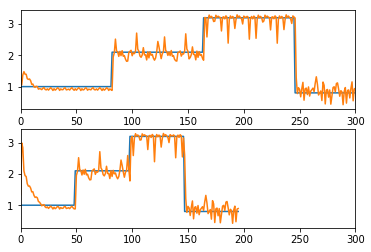

In [51]:
# Testing the network performance on unknown data  
plt.figure() 

plt.subplot(211) 
visualize_output(nn, 82) 
plt.xlim([0, 300]) 

plt.subplot(212) 
visualize_output(nn, 49) 
plt.xlim([0, 300]) 

plt.show() 